<a href="https://colab.research.google.com/github/wilmerod/Curso-de-introduccion-a-Big-Data-Parte-1-nov2021/blob/main/Mod3_T3_2_Regresion_lineal_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de Regresión Lineal Múltiple con Scikit Learn

## Importamos librerías

In [ ]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


## Generamos una distribución de datos aleatoria con Random

In [ ]:
def generador_datos_multiple(coeficientes, muestras, std_dev):
  # Calculamos el número de predictores y creamos una matriz 
  # con los coeficientes con p filas y 1 columna para 
  # multiplicación de matrices
  n_coeficientes = len(coeficientes)
  coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
  
  x = np.random.random_sample((muestras, n_coeficientes)) * 100
  epsilon = np.random.randn(muestras) * std_dev
  # Como x es una matriz muestras x n_coeficientes, y 
  # coef_matriz es n_coeficientes x 1
  # Podemos hacer multiplicación de matrices para obtener y 
  # dados x1,x2,...,xn necesitamos hacer la transpuesta 
  # para obtener un array 1xmuestras en lugar de muestrasx1 para 
  # usar la regresión
  y = np.matmul(x, coef_matriz).transpose() + epsilon
  return x, y

In [ ]:
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100
 
X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)

## Creamos el modelo de regresión lineal

In [ ]:
modelo = linear_model.LinearRegression()

## Entrenamos el modelo

In [ ]:
modelo.fit(X, Y.transpose())

LinearRegression()

## Generamos la predicción y calculamos el error


In [ ]:
y_pred = modelo.predict(X)

print (f'Error cuadrático medio: {mean_squared_error(Y.transpose(), y_pred)}')
print (f'Estadístico R_2: {r2_score(Y.transpose(), y_pred)}')

Error cuadrático medio: 12422.775057314328
Estadístico R_2: 0.9034460553375934


## Generamos una distribución Y de datos aleatoria de dos variables X1 y X2

Text(0, 0.5, 'Y')

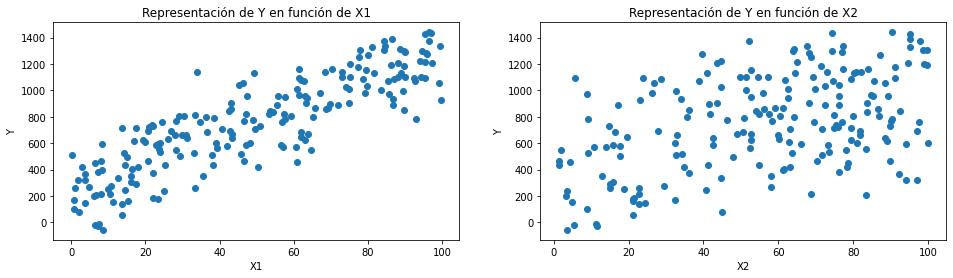

In [ ]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(16)
 
p1.scatter(X[:,0], Y)
p1.set_title(u'Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')
 
p2.scatter(X[:,1], Y)
p2.set_title(u'Representación de Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('Y')


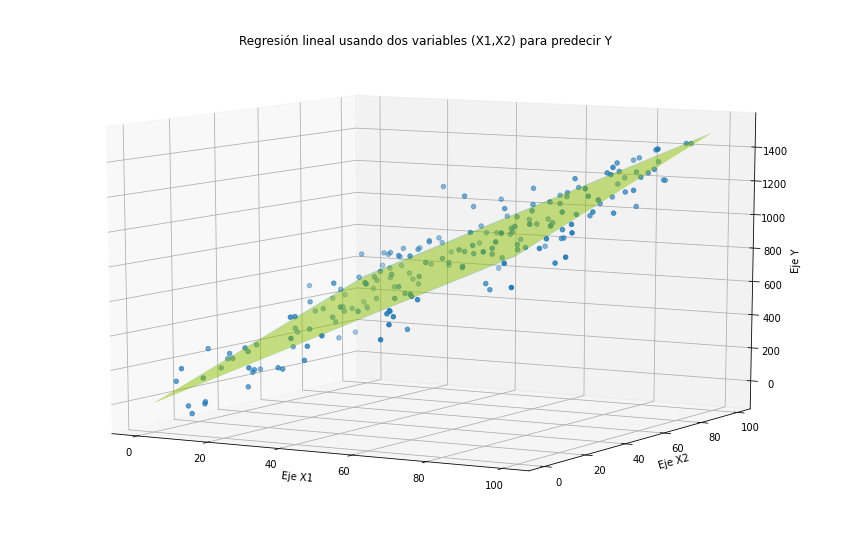

In [ ]:
# Represento la superficie que ajusta mejor a los datos
p3 = plt.figure(figsize=(15,10)).gca(projection='3d')
x1, x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = modelo.coef_[0][0]*x1 + modelo.coef_[0][1]*x2
# Superficie real de los datos
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies
p3.plot_surface(x1, x2, z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2, z_real, alpha=0.3, color='yellow')
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables (X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y')
p3.view_init(10, )
plt.show()


Ejemplo adaptado del publicado en [machinelearningparatodos.com](https://machinelearningparatodos.com/regresion-lineal-en-python/)